正月の代名詞ともいえる食べ物といえば，餅である．餅は，老若男女問わず多くの人に好まれてきた．しかし，それと同様に餅は多くの人を死に追いやった経歴をもつ．
そこで，本レポートでは，餅による死者数の推移を機械学習を用いて予測できるかを検討したい．  
しかし，都合よく餅の死者数の推移のデータが見つからなかった．そのため，代替データとして，厚生労働省の人口動態調査から，不慮の事故の「その他の不慮の窒息」のうち，「気道閉塞を生じた食物の誤えん」による死亡者数を抽出し，使用することする．
なお，使用したデータは[政府統計の総合窓口](https://www.e-stat.go.jp/)から参照した．また，上記のデータについて，今回はサンプル数の多い高齢者(65歳以上)のデータを対象に予測を試みる．

まず，今回使用するライブラリをインポートする．今回は，時系列データの予測にKerasのLSTMを用いる．

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras.optimizers import Adam
import tensorflow as tf

%matplotlib inline

今回使用するデータを読み込んでおく．なお，ここではすべてベタ書きで入力しているが，使用するデータは，"data.csv"と同じなので参照されたい．
ここでは，1列目が年度(平成)，2列目が65-80の死者数，3列目が80-の死者数，4列目が2列目+3列目，すなわち高齢者の死者数を表す．

In [2]:
data = np.array([[   7., 1329., 1770., 3099.],
       [   8., 1260., 1728., 2988.],
       [   9., 1228., 1786., 3014.],
       [  10., 1332., 1942., 3274.],
       [  11., 1417., 1979., 3396.],
       [  12., 1353., 1967., 3320.],
       [  13., 1454., 2035., 3489.],
       [  14., 1406., 2129., 3535.],
       [  15., 1434., 2153., 3587.],
       [  16., 1424., 2144., 3568.],
       [  17., 1467., 2329., 3796.],
       [  18., 1371., 2358., 3729.],
       [  19., 1344., 2449., 3793.],
       [  20., 1418., 2664., 4082.],
       [  21., 1370., 2687., 4057.],
       [  22., 1423., 2826., 4249.],
       [  23., 1365., 2846., 4211.],
       [  24., 1461., 3053., 4514.],
       [  25., 1379., 2815., 4194.],
       [  26., 1457., 2853., 4310.],
       [  27., 1303., 2900., 4203.],
       [  28., 1358., 3012., 4370.],
       [  29., 1275., 3001., 4276.]])

次に，Kerasで入力として使用する，データのフォーマットを行う．

In [3]:
input_data = data[:, 3]
input_min = input_data.min()
input_range = input_data.max() - input_min
input_data = (input_data - input_min) / input_range


その後，教師データの作成を行う．今回は，1年分のデータ予測に直近の6年間のデータを使用することとする．なお，ここの処理は[Kerasで最短(?)LSTM実装 - 雑記 in hibernation](https://toeming.hatenablog.com/entry/2020/06/02/231233)を参考にした．

In [4]:
def make_dataset(low_data, maxlen):

    data, target = [], []

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target

window_size = 6
x, y = make_dataset(input_data, window_size)

そして，モデルの構築と予測を行う．ここでは，次の1年間について予測を行う．なお，パラメータに関しては特にチューニングを行わなず，適当に値を設定している．

In [ ]:
model = Sequential()
model.add(LSTM(10, batch_input_shape=(None, window_size, 1))) # LSTM 50層
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam() , metrics = ['accuracy'])
model.fit(x, y, epochs=100, verbose=2)
Predict = model.predict(input_data[None, input_data.shape[0]-6:, None])


Epoch 1/100
1/1 - 2s - loss: 0.7350 - accuracy: 0.0000e+00
Epoch 2/100
1/1 - 0s - loss: 0.7177 - accuracy: 0.0000e+00
Epoch 3/100
1/1 - 0s - loss: 0.7007 - accuracy: 0.0000e+00
Epoch 4/100
1/1 - 0s - loss: 0.6840 - accuracy: 0.0000e+00
Epoch 5/100
1/1 - 0s - loss: 0.6676 - accuracy: 0.0000e+00
Epoch 6/100
1/1 - 0s - loss: 0.6515 - accuracy: 0.0000e+00
Epoch 7/100
1/1 - 0s - loss: 0.6356 - accuracy: 0.0000e+00
Epoch 8/100
1/1 - 0s - loss: 0.6201 - accuracy: 0.0000e+00
Epoch 9/100
1/1 - 0s - loss: 0.6048 - accuracy: 0.0000e+00
Epoch 10/100
1/1 - 0s - loss: 0.5898 - accuracy: 0.0000e+00
Epoch 11/100
1/1 - 0s - loss: 0.5750 - accuracy: 0.0000e+00
Epoch 12/100
1/1 - 0s - loss: 0.5606 - accuracy: 0.0000e+00
Epoch 13/100
1/1 - 0s - loss: 0.5464 - accuracy: 0.0000e+00
Epoch 14/100
1/1 - 0s - loss: 0.5325 - accuracy: 0.0000e+00
Epoch 15/100
1/1 - 0s - loss: 0.5188 - accuracy: 0.0000e+00
Epoch 16/100
1/1 - 0s - loss: 0.5053 - accuracy: 0.0000e+00
Epoch 17/100
1/1 - 0s - loss: 0.4922 - accuracy: 

最後に，モデルの予測の可視化及び，平成30年度の死者数の予測を出力する．
なお，[0-1]で正規化したデータから学習を行っているため，出力には入力データと逆の変換を行っている．

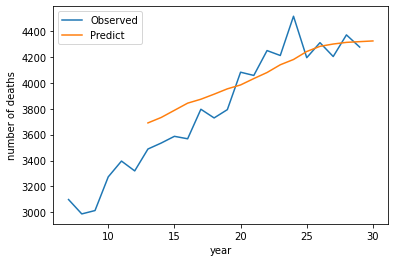

平成30年の予測死者は4323人です


In [ ]:
y_predict = model.predict(x)
plt.plot(data[:, 0], (input_data * input_range) + input_min, label = "Observed")
plt.plot(np.hstack([data[6:, 0], [30]]), (np.hstack([y_predict.squeeze(), Predict.squeeze()]) * input_range) + input_min, label = "Predicted")
plt.xlabel("year")
plt.ylabel("number of deaths")
plt.legend()
plt.show()
print("平成30年の予測死者は" + str(((Predict.squeeze() * input_range) + input_min).astype(int)) + "人です")

あまり深く考えずにモデルの構築を行ったことと，入力データの少なさからか，あまりうまく近似できていないことが見て取れる．ただ，死者数が年々増加している傾向を，LSTMでなんとなくつかめているのではないだろうか．